In [104]:
# Import libaries:
import numpy as np  # import numpy
import pandas as pd # import pandas
import satact as sa # import satact module from satact.py file
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



In [106]:
# Read 2017 and 2018 SAT and ACT data csv data as DataFrames using Pandas:
sat_17 = pd.read_csv('./data/sat_2017.csv')
sat_18 = pd.read_csv('./data/sat_2018.csv')
act_17 = pd.read_csv('./data/act_2017.csv')
act_18 = pd.read_csv('./data/act_2018.csv')

In [107]:
sat_17.name = 'SAT 2017'
sat_18.name = 'SAT 2018'
act_17.name = 'ACT 2017'
act_18.name = 'ACT 2018'

sa.sat_17 = sat_17
sa.sat_18 = sat_18
sa.act_17 = act_17
sa.act_18 = act_18

In [108]:
# Initialize list of the DataFrame objects we are currently working with.
df_list = [sat_17, sat_18, act_17, act_18]

In [109]:
# Preview the first 5 rows of each DataFrame using the print_props function:
sa.print_props(df_list, '.head()')

	First 5 rows of SAT 2017
----------------------------------------
        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            5%                                 593   572   1165
1      Alaska           38%                                 547   533   1080
2     Arizona           30%                                 563   553   1116
3    Arkansas            3%                                 614   594   1208
4  California           53%                                 531   524   1055

	First 5 rows of SAT 2018
----------------------------------------
        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California     

In [110]:
sa.print_props(df_list, '.dtypes')

	Data Types of SAT 2017
----------------------------------------
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

	Data Types of SAT 2018
----------------------------------------
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

	Data Types of ACT 2017
----------------------------------------
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

	Data Types of ACT 2018
----------------------------------------
State            object
Participation    object
Composite        objec

In [111]:
act_17['Composite'].value_counts(ascending=False)

19.8     3
21.4     3
20.3     3
19.4     2
23.6     2
21.9     2
24.2     2
20.4     2
21.8     2
24.1     2
19.7     2
23.9     1
20.0     1
25.5     1
25.4     1
17.8     1
24.3     1
25.2     1
24.0     1
22.0     1
18.7     1
19.5     1
20.7     1
22.3     1
21.5     1
19.2     1
23.8     1
22.8     1
19.1     1
19.0     1
18.6     1
20.2x    1
20.5     1
23.7     1
20.8     1
21.7     1
21.0     1
22.6     1
Name: Composite, dtype: int64

In [112]:
act_17['Composite'] = act_17['Composite'].apply(lambda x_cell: x_cell.strip('x'))

In [113]:
act_18['Composite'].value_counts(ascending=False)

23.9     3
20       3
20.3     3
24.2     2
19.4     2
24       2
21.3     2
19.1     2
19.2     2
22.5     2
22.2     1
18.6     1
19.3     1
21.6     1
21.4     1
19.6     1
17.7     1
20.2     1
23.6     1
23.7     1
22.3     1
20.5     1
18.9     1
24.1     1
20.8     1
20.1     1
18.3     1
25.5     1
25.1     1
20.4     1
22.7     1
25.6     1
24.5     1
23.5     1
21.8     1
21.9     1
#REF!    1
23.8     1
19.9     1
20.7     1
Name: Composite, dtype: int64

In [114]:
sa.compare_values(act_18['State'], sat_18['State'])

Values in ACT only: 
Washington, D.C.
National
----------------------------
Values in SAT only: 
District of Columbia


In [115]:
act_18[act_18['State'] == 'National']

,State,Participation,Composite
23,National,50%,#REF!


In [116]:
act_18.drop(act_18.index[23], inplace=True)

In [117]:
act_18['State'].replace({'Washington, D.C.': 'District of Columbia'}, inplace=True)

In [118]:
sa.compare_values(act_17['State'], sat_17['State'])

Values in ACT only: 
National
----------------------------
Values in SAT only: 


In [119]:
act_17[act_17['State'] == 'National']

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0


In [120]:
act_17.drop(act_17.index[0], inplace=True)

In [121]:
act_18.sort_values(by=['State'], inplace=True)
sat_18.sort_values(by=['State'], inplace=True)

In [122]:
sat_18 = sat_18.reset_index(drop=True)
act_18 = act_18.reset_index(drop=True)

In [123]:
act_17['Participation'] = sa.fix_participation(act_17['Participation'])
act_18['Participation'] = sa.fix_participation(act_18['Participation'])
sat_17['Participation'] = sa.fix_participation(sat_17['Participation'])
sat_18['Participation'] = sa.fix_participation(sat_18['Participation'])

In [124]:
sa.print_props(df_list, '.dtypes')

	Data Types of SAT 2017
----------------------------------------
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

	Data Types of SAT 2018
----------------------------------------
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

	Data Types of ACT 2017
----------------------------------------
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

	Data Types of ACT 2018
----------------------------------------
State            object
Participation    object
Composite        objec

In [125]:
act_17 = sa.convert_to_float(act_17)
sat_17 = sa.convert_to_float(sat_17)
act_18 = sa.convert_to_float(act_18)
sat_18 = sa.convert_to_float(sat_18)

In [126]:
# df_list = sa.df_list_init(4)
df_list = [sat_17, sat_18, act_17, act_18]
sat_17.name = 'SAT 2017'
sat_18.name = 'SAT 2018'
act_17.name = 'ACT 2017'
act_18.name = 'ACT 2018'

In [127]:
sa.print_props(df_list, '.dtypes')

	Data Types of SAT 2017
----------------------------------------
State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

	Data Types of SAT 2018
----------------------------------------
State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

	Data Types of ACT 2017
----------------------------------------
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

	Data Types of ACT 2018
----------------------------------------
State             object
Participation    float64
Composite 

In [128]:
sa.print_props(df_list, '.shape')

	Shape of SAT 2017
----------------------------------------
(51, 5)

	Shape of SAT 2018
----------------------------------------
(51, 5)

	Shape of ACT 2017
----------------------------------------
(51, 7)

	Shape of ACT 2018
----------------------------------------
(52, 3)



In [129]:
counts = act_18['State'].value_counts()
counts[counts != 1]

Maine    2
Name: State, dtype: int64

In [130]:
act_18[act_18['State'] == 'Maine']

,State,Participation,Composite
19,Maine,7.0,24.0
20,Maine,7.0,24.0


In [131]:
act_18.drop(act_18.index[20], inplace=True)
act_18.sort_values(by=['State'], inplace=True)
act_18 = act_18.reset_index(drop=True)

In [132]:
df_list = [sat_17, sat_18, act_17, act_18]
sat_17.name = 'SAT 2017'
sat_18.name = 'SAT 2018'
act_17.name = 'ACT 2017'
act_18.name = 'ACT 2018'

In [133]:
sa.print_props(df_list, '.shape')

	Shape of SAT 2017
----------------------------------------
(51, 5)

	Shape of SAT 2018
----------------------------------------
(51, 5)

	Shape of ACT 2017
----------------------------------------
(51, 7)

	Shape of ACT 2018
----------------------------------------
(51, 3)



In [134]:
# Check for missing data:
sa.print_props(df_list, '.isnull().sum()')

	Null Values in SAT 2017
----------------------------------------
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

	Null Values in SAT 2018
----------------------------------------
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

	Null Values in ACT 2017
----------------------------------------
State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

	Null Values in ACT 2018
----------------------------------------
State            0
Participation    0
Composite        0
dtype: int64



In [135]:
# rename the 2017 ACT columns
new_act_17_cols = {
    'State':'state',
    'Participation':'act_participation_17',
    'Composite':'act_composite_17'
}
act_17.rename(columns=new_act_17_cols, inplace=True)

In [136]:
sat_17.drop(columns = ['Evidence-Based Reading and Writing', 'Math'], inplace = True)
act_17.drop(columns = ['English', 'Math', 'Reading', 'Science'], inplace = True)

In [137]:
# rename the 2017 SAT columns
new_sat_17_cols = {
    'State':'state',
    'Participation':'sat_participation_17',
    'Total':'sat_score_17'
    }
sat_17.rename(columns=new_sat_17_cols, inplace=True)

In [138]:
act_17.name = 'ACT 2017'
sat_17.name = 'SAT 2017'
df_list = [act_17, sat_17]

In [139]:
sa.print_props(df_list, '.columns')

	Column Features of ACT 2017
----------------------------------------
Index(['state', 'act_participation_17', 'act_composite_17'], dtype='object')

	Column Features of SAT 2017
----------------------------------------
Index(['state', 'sat_participation_17', 'sat_score_17'], dtype='object')



In [140]:
sa.print_props(df_list, '.dtypes')

	Data Types of ACT 2017
----------------------------------------
state                    object
act_participation_17    float64
act_composite_17        float64
dtype: object

	Data Types of SAT 2017
----------------------------------------
state                    object
sat_participation_17    float64
sat_score_17            float64
dtype: object



In [141]:
sa.print_props(df_list, '.head()')

	First 5 rows of ACT 2017
----------------------------------------
        state  act_participation_17  act_composite_17
1     Alabama                 100.0              19.2
2      Alaska                  65.0              19.8
3     Arizona                  62.0              19.7
4    Arkansas                 100.0              19.4
5  California                  31.0              22.8

	First 5 rows of SAT 2017
----------------------------------------
        state  sat_participation_17  sat_score_17
0     Alabama                   5.0        1165.0
1      Alaska                  38.0        1080.0
2     Arizona                  30.0        1116.0
3    Arkansas                   3.0        1208.0
4  California                  53.0        1055.0



In [142]:
sa.print_props(df_list, '.shape')

	Shape of ACT 2017
----------------------------------------
(51, 3)

	Shape of SAT 2017
----------------------------------------
(51, 3)



In [143]:
sa.print_props(df_list, '.isnull().sum()')

	Null Values in ACT 2017
----------------------------------------
state                   0
act_participation_17    0
act_composite_17        0
dtype: int64

	Null Values in SAT 2017
----------------------------------------
state                   0
sat_participation_17    0
sat_score_17            0
dtype: int64



In [144]:
sat_act_17 = pd.merge(sat_17, act_17, left_index=True, on = 'state', how='outer')
sat_act_17.name = 'SAT/ACT 2017'
sa.sat_act_17 = sat_act_17

In [145]:
# rename the 2018 ACT columns
new_act_18_cols = {
    'State':'state',
    'Participation':'act_participation_18',
    'Composite':'act_composite_18'
}
act_18.rename(columns=new_act_18_cols, inplace=True)

In [146]:
# rename the 2018 SAT columns
new_sat_18_cols = {
    'State':'state',
    'Participation':'sat_participation_18',
    'Total':'sat_score_18'
    }
sat_18.rename(columns=new_sat_18_cols, inplace=True)

In [147]:
df_list = [sat_18, act_18]
act_18.name = 'ACT 2018'
sat_18.name = 'SAT 2018'

In [148]:
sa.print_props(df_list, '.columns')

	Column Features of SAT 2018
----------------------------------------
Index(['state', 'sat_participation_18', 'Evidence-Based Reading and Writing',
       'Math', 'sat_score_18'],
      dtype='object')

	Column Features of ACT 2018
----------------------------------------
Index(['state', 'act_participation_18', 'act_composite_18'], dtype='object')



In [149]:
sat_18.drop(columns = ['Evidence-Based Reading and Writing', 'Math'], inplace=True)

In [150]:
sa.print_props(df_list, '.columns')

	Column Features of SAT 2018
----------------------------------------
Index(['state', 'sat_participation_18', 'sat_score_18'], dtype='object')

	Column Features of ACT 2018
----------------------------------------
Index(['state', 'act_participation_18', 'act_composite_18'], dtype='object')



In [151]:
sa.print_props(df_list, '.shape')

	Shape of SAT 2018
----------------------------------------
(51, 3)

	Shape of ACT 2018
----------------------------------------
(51, 3)



In [152]:
sa.print_props(df_list, '.dtypes')

	Data Types of SAT 2018
----------------------------------------
state                    object
sat_participation_18    float64
sat_score_18            float64
dtype: object

	Data Types of ACT 2018
----------------------------------------
state                    object
act_participation_18    float64
act_composite_18        float64
dtype: object



In [153]:
sa.print_props(df_list, '.isnull().sum()')

	Null Values in SAT 2018
----------------------------------------
state                   0
sat_participation_18    0
sat_score_18            0
dtype: int64

	Null Values in ACT 2018
----------------------------------------
state                   0
act_participation_18    0
act_composite_18        0
dtype: int64



In [154]:
sat_act_18 = pd.merge(sat_18, act_18, left_index=True, on = 'state', how='outer')
sat_act_18 = sat_act_18.reset_index(drop=True)
sa.sat_act_18 = sat_act_18

In [155]:
# df_list = sa.df_list_init(2)
df_list = [sat_act_17, sat_act_18]
sat_act_18.name = 'SAT/ACT 2018'

In [156]:
sa.print_props(df_list, '.columns')

	Column Features of SAT/ACT 2017
----------------------------------------
Index(['state', 'sat_participation_17', 'sat_score_17', 'act_participation_17',
       'act_composite_17'],
      dtype='object')

	Column Features of SAT/ACT 2018
----------------------------------------
Index(['state', 'sat_participation_18', 'sat_score_18', 'act_participation_18',
       'act_composite_18'],
      dtype='object')



In [157]:
sa.print_props(df_list, '.head()')

	First 5 rows of SAT/ACT 2017
----------------------------------------
        state  sat_participation_17  sat_score_17  act_participation_17  \
1     Alabama                   5.0        1165.0                 100.0   
2      Alaska                  38.0        1080.0                  65.0   
3     Arizona                  30.0        1116.0                  62.0   
4    Arkansas                   3.0        1208.0                 100.0   
5  California                  53.0        1055.0                  31.0   

   act_composite_17  
1              19.2  
2              19.8  
3              19.7  
4              19.4  
5              22.8  

	First 5 rows of SAT/ACT 2018
----------------------------------------
        state  sat_participation_18  sat_score_18  act_participation_18  \
0     Alabama                   6.0        1166.0                 100.0   
1      Alaska                  43.0        1106.0                  33.0   
2     Arizona                  29.0        1149.0

In [158]:
sa.print_props(df_list, '.shape')

	Shape of SAT/ACT 2017
----------------------------------------
(51, 5)

	Shape of SAT/ACT 2018
----------------------------------------
(51, 5)



In [159]:
sa.print_props(df_list, '.dtypes')

	Data Types of SAT/ACT 2017
----------------------------------------
state                    object
sat_participation_17    float64
sat_score_17            float64
act_participation_17    float64
act_composite_17        float64
dtype: object

	Data Types of SAT/ACT 2018
----------------------------------------
state                    object
sat_participation_18    float64
sat_score_18            float64
act_participation_18    float64
act_composite_18        float64
dtype: object



In [160]:
sa.print_props(df_list, '.isnull().sum()')

	Null Values in SAT/ACT 2017
----------------------------------------
state                   0
sat_participation_17    0
sat_score_17            0
act_participation_17    0
act_composite_17        0
dtype: int64

	Null Values in SAT/ACT 2018
----------------------------------------
state                   0
sat_participation_18    0
sat_score_18            0
act_participation_18    0
act_composite_18        0
dtype: int64



In [161]:
sat_act_17.to_csv('./data/sat_act_17.csv', encoding='utf-8', index = False)
sat_act_18.to_csv('./data/sat_act_18.csv', encoding='utf-8', index = False)

In [162]:
df = pd.merge(sat_act_17, sat_act_18, left_index=True, on = 'state', how='outer')
df.head()

,state,sat_participation_17,sat_score_17,act_participation_17,act_composite_17,sat_participation_18,sat_score_18,act_participation_18,act_composite_18
0,Alabama,5.0,1165.0,100.0,19.2,6.0,1166.0,100.0,19.1
1,Alaska,38.0,1080.0,65.0,19.8,43.0,1106.0,33.0,20.8
2,Arizona,30.0,1116.0,62.0,19.7,29.0,1149.0,66.0,19.2
3,Arkansas,3.0,1208.0,100.0,19.4,5.0,1169.0,100.0,19.4
4,California,53.0,1055.0,31.0,22.8,60.0,1076.0,27.0,22.7


In [163]:
# Verify sat_act merge.
counts = df['state'].value_counts()
counts[counts != 1]

Series([], Name: state, dtype: int64)

In [164]:
df.isnull().sum()

state                   0
sat_participation_17    0
sat_score_17            0
act_participation_17    0
act_composite_17        0
sat_participation_18    0
sat_score_18            0
act_participation_18    0
act_composite_18        0
dtype: int64

In [165]:
df.shape

(51, 9)

In [166]:
df.dtypes

state                    object
sat_participation_17    float64
sat_score_17            float64
act_participation_17    float64
act_composite_17        float64
sat_participation_18    float64
sat_score_18            float64
act_participation_18    float64
act_composite_18        float64
dtype: object

In [167]:
# df.to_csv('./data/sat_act_2017_2018.csv', encoding='utf-8', index = False)

In [168]:
# States that have >50% participation rates on both the SAT and ACT in 2017:
sa.half_of_both(df, 'sat_participation_17', 'act_participation_17')

9     Florida
10    Georgia
11     Hawaii
Name: state, dtype: object

In [169]:
# States that have >50% participation rates on both the SAT and ACT in 2018:
sa.half_of_both(df, 'sat_participation_18', 'act_participation_18')

9            Florida
10           Georgia
11            Hawaii
33    North Carolina
40    South Carolina
Name: state, dtype: object

In [170]:
# States that have <50% participation rates on both the SAT and ACT in 2017:
sa.half_of_both(df, 'sat_participation_17', 'act_participation_17', False)

37    Oregon
Name: state, dtype: object

In [171]:
# States that have <50% participation rates on both the SAT and ACT in 2018:
sa.half_of_both(df, 'sat_participation_18', 'act_participation_18', False)

1     Alaska
37    Oregon
Name: state, dtype: object

In [172]:
# States with 100% SAT participation in both 2017 and 2018
sa.perfect_scores(df, 'sat_participation_17', 'sat_participation_18')

6     Connecticut
7        Delaware
22       Michigan
Name: state, dtype: object

In [173]:
# States with 100% ACT participation in both 2017 and 2018
sa.perfect_scores(df, 'act_participation_17', 'act_participation_18')

0            Alabama
3           Arkansas
17          Kentucky
18         Louisiana
24       Mississippi
25          Missouri
26           Montana
28            Nevada
33    North Carolina
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

In [174]:
# States with 100% SAT participation rates in 2017.
df[df['sat_participation_17'] == 100.0]['state']

6              Connecticut
7                 Delaware
8     District of Columbia
22                Michigan
Name: state, dtype: object

In [175]:
# States with 100% SAT participation rates in 2018.
df[df['sat_participation_18'] == 100.0]['state']

5        Colorado
6     Connecticut
7        Delaware
12          Idaho
22       Michigan
Name: state, dtype: object

In [176]:
# States with less than 10% SAT participation rates in 2017.
df[df['sat_participation_17'] < 10.0]['state']

0          Alabama
3         Arkansas
13        Illinois
15            Iowa
16          Kansas
17        Kentucky
18       Louisiana
23       Minnesota
24     Mississippi
25        Missouri
27        Nebraska
34    North Dakota
36        Oklahoma
41    South Dakota
42       Tennessee
44            Utah
49       Wisconsin
50         Wyoming
Name: state, dtype: object

In [177]:
# States with the lowest SAT participation rates in 2018, less than 10%.
df[df['sat_participation_18'] < 10.0]['state']

0          Alabama
3         Arkansas
15            Iowa
16          Kansas
17        Kentucky
18       Louisiana
23       Minnesota
24     Mississippi
25        Missouri
27        Nebraska
34    North Dakota
36        Oklahoma
41    South Dakota
42       Tennessee
44            Utah
49       Wisconsin
50         Wyoming
Name: state, dtype: object

In [178]:
# States with 100% ACT participation rates in 2017.
df[df['act_participation_17'] == 100.0]['state']

0            Alabama
3           Arkansas
5           Colorado
17          Kentucky
18         Louisiana
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
28            Nevada
33    North Carolina
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

In [179]:
# States with 100% ACT participation rates in 2018.
df[df['act_participation_18'] == 100.0]['state']

0            Alabama
3           Arkansas
17          Kentucky
18         Louisiana
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
33    North Carolina
35              Ohio
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

In [180]:
# States with the lowest ACT participation rates in 2017, less than 10%.
df[df['act_participation_17'] < 10.0]['state']

19    Maine
Name: state, dtype: object

In [181]:
# States with the lowest ACT participation rates in 2018, less than 10%.
df[df['act_participation_18'] < 10.0]['state']

19    Maine
Name: state, dtype: object

In [182]:
# 2017 SAT lowest average scores per state:
sa.worst_averages(df, 'sat_score_17')

7                 Delaware
8     District of Columbia
9                  Florida
12                   Idaho
19                   Maine
22                Michigan
43                   Texas
Name: state, dtype: object

In [183]:
# 2017 ACT lowest average scores per state:
sa.worst_averages(df, 'act_composite_17')

0            Alabama
3           Arkansas
11            Hawaii
24       Mississippi
28            Nevada
33    North Carolina
36          Oklahoma
40    South Carolina
Name: state, dtype: object

In [184]:
# 2018 SAT lowest average scores per state:
sa.worst_averages(df, 'sat_score_18')

5                 Colorado
7                 Delaware
8     District of Columbia
11                  Hawaii
12                   Idaho
13                Illinois
19                   Maine
22                Michigan
39            Rhode Island
44                    Utah
48           West Virginia
Name: state, dtype: object

In [185]:
# 2018 ACT lowest average scores per state:
sa.worst_averages(df, 'act_composite_18')

0            Alabama
2            Arizona
11            Hawaii
18         Louisiana
24       Mississippi
28            Nevada
33    North Carolina
36          Oklahoma
40    South Carolina
Name: state, dtype: object

In [186]:
# 2017 SAT highest average scores per state:
sa.top_averages(df, 'sat_score_17')

15            Iowa
16          Kansas
17        Kentucky
23       Minnesota
24     Mississippi
25        Missouri
27        Nebraska
34    North Dakota
42       Tennessee
44            Utah
49       Wisconsin
50         Wyoming
Name: state, dtype: object

In [187]:
# 2017 ACT highest average scores per state:
sa.top_averages(df, 'act_composite_17')

6              Connecticut
7                 Delaware
8     District of Columbia
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
29           New Hampshire
30              New Jersey
32                New York
38            Pennsylvania
39            Rhode Island
45                 Vermont
46                Virginia
Name: state, dtype: object

In [188]:
# 2018 SAT highest average scores per state:
sa.top_averages(df, 'sat_score_18')

15            Iowa
16          Kansas
17        Kentucky
23       Minnesota
24     Mississippi
25        Missouri
27        Nebraska
34    North Dakota
41    South Dakota
42       Tennessee
49       Wisconsin
50         Wyoming
Name: state, dtype: object

In [189]:
# 2018 ACT highest average scores per state:
sa.top_averages(df, 'act_composite_18')

5          Colorado
6       Connecticut
7          Delaware
13         Illinois
19            Maine
21    Massachusetts
22         Michigan
29    New Hampshire
30       New Jersey
32         New York
39     Rhode Island
45          Vermont
46         Virginia
Name: state, dtype: object

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

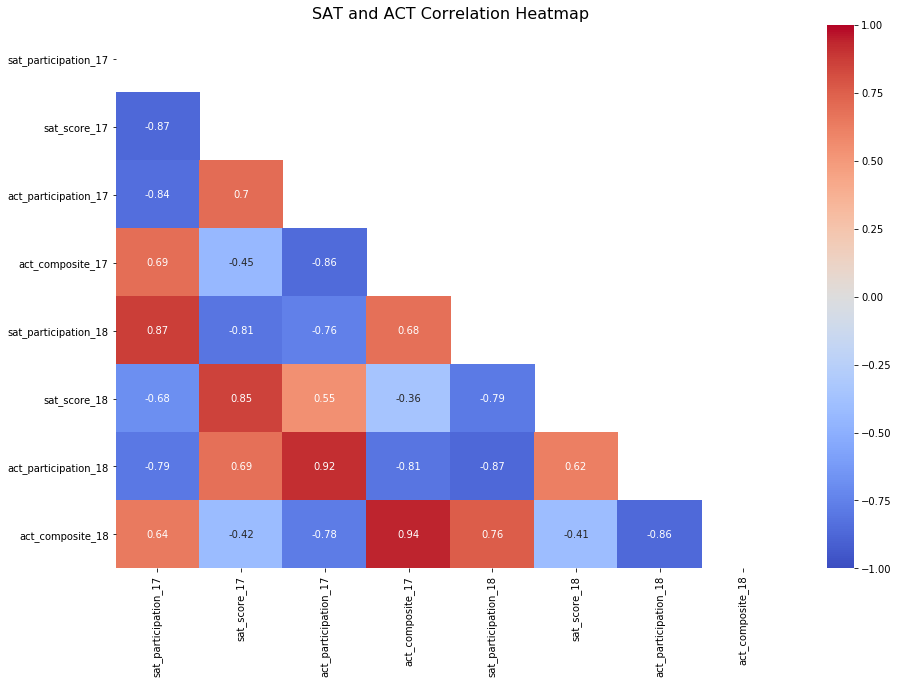

In [191]:
plt.figure(figsize = (15,10))
plt.title('SAT and ACT Correlation Heatmap', fontsize = 16);

# Mask to remove redundancy from the heatmap.
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax = 1, cmap = "coolwarm",  annot = True);
plt.savefig('./images/sat_act_heatmap.png')

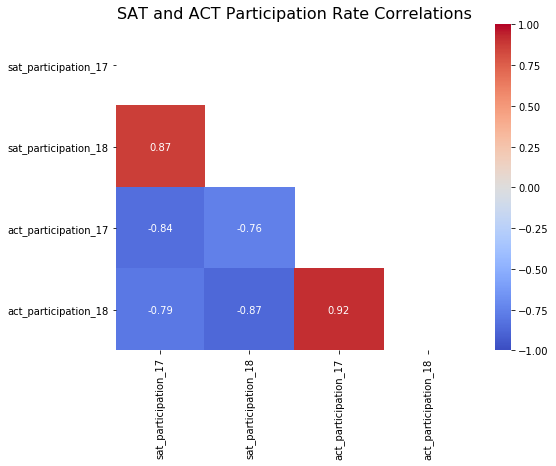

In [93]:
plt.figure(figsize = (8,6))
features = ['sat_participation_17', 'sat_participation_18', 'act_participation_17', 'act_participation_18']
plt.title('SAT and ACT Participation Rate Correlations', fontsize = 16);
mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df[features].corr(), mask=mask, vmin=-1, vmax = 1, cmap = "coolwarm",  annot = True);
plt.savefig('./images/participation_heatmap.png')

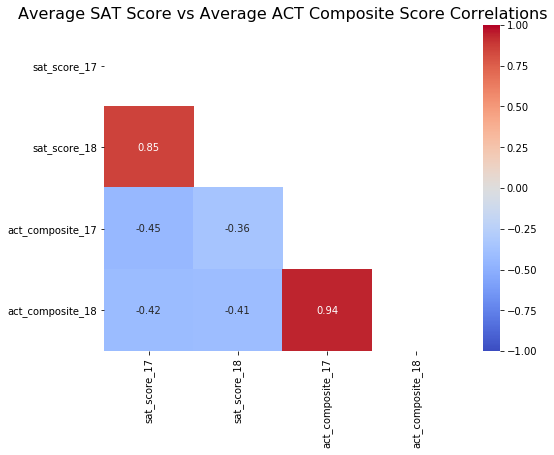

In [94]:
plt.figure(figsize = (8,6))
features = ['sat_score_17', 'sat_score_18', 'act_composite_17', 'act_composite_18']
plt.title('Average SAT Score vs Average ACT Composite Score Correlations', fontsize = 16);
mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df[features].corr(), mask=mask, vmin=-1, vmax = 1, cmap = "coolwarm",  annot = True);
plt.savefig('./images/score_vs_composite_heatmap.png')

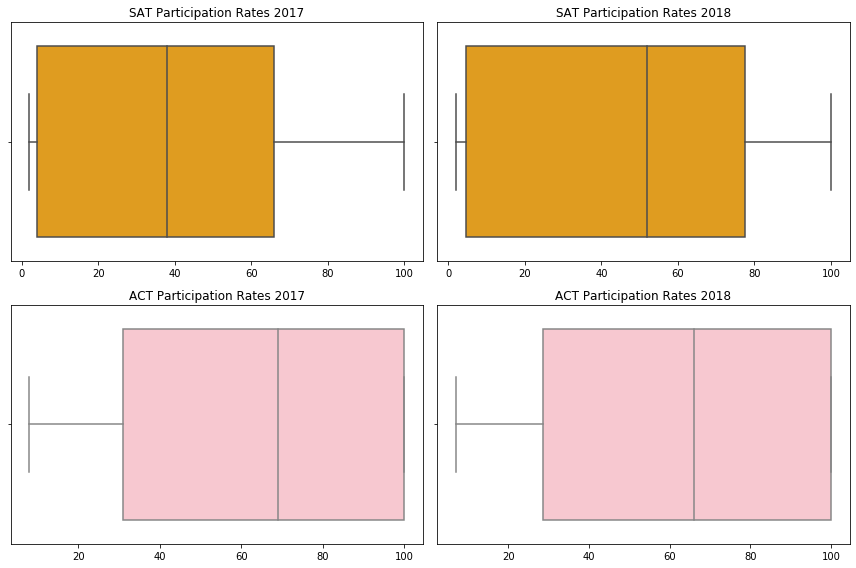

In [95]:
# Boxplots comparing the average participation rates of the 2017 ACT, 2018 ACT, 2017 SAT, and 2018 SAT.
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

sns.boxplot(df.sat_participation_17, ax = ax[0,0], orient="h", color = 'orange').set(
    xlabel='', title='SAT Participation Rates 2017');

sns.boxplot(df.sat_participation_18, ax = ax[0,1], orient="h", color = 'orange').set(
    xlabel='', title='SAT Participation Rates 2018');

sns.boxplot(df.act_participation_17, ax = ax[1,0], orient="h", color= 'pink').set(
    xlabel='', title='ACT Participation Rates 2017');

sns.boxplot(df.act_participation_18, ax = ax[1,1], orient="h", color = 'pink').set(
    xlabel='', title='ACT Participation Rates 2018');

plt.tight_layout()

plt.savefig('./images/participation_rate_boxplots.png');

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_score_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_participation_18,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat_score_18,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act_participation_18,51.0,61.725490,34.037085,7.0,28.50,66.0,100.00,100.0
act_composite_18,51.0,21.496078,2.111583,17.7,19.95,21.3,23.65,25.6


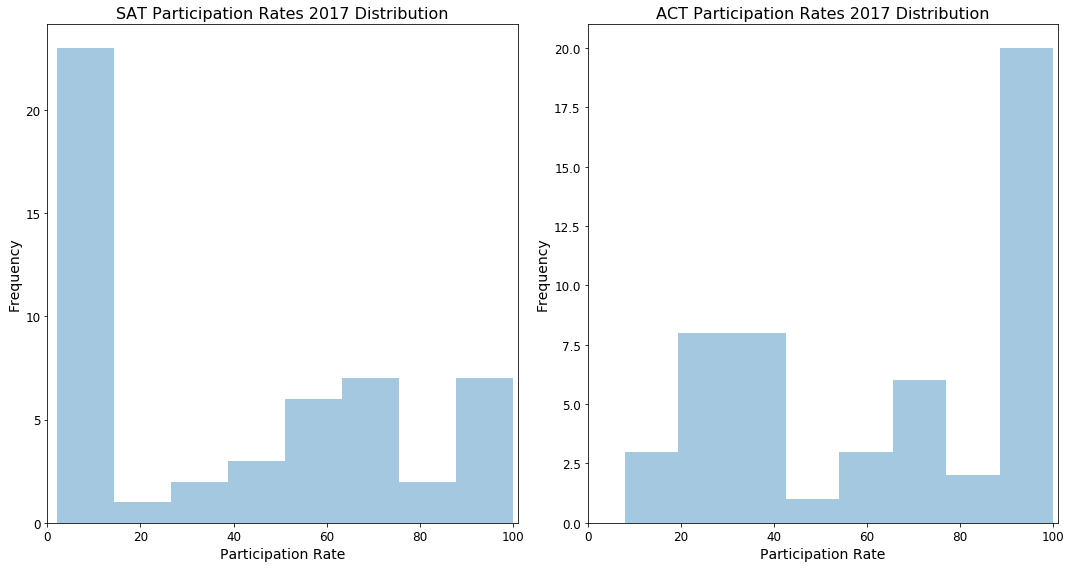

In [101]:
plt.figure(figsize = (15,8))

# SAT Participation Rates 2017 histogram
plt.subplot(1,2,1) 
sns.distplot(df.sat_participation_17, kde=False,bins=8);

plt.title('SAT Participation Rates 2017 Distribution', fontsize=16)
plt.xlabel('Participation Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xlim(0, 101)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# ACT Participation Rates 2017 histogram
plt.subplot(1,2,2) 
sns.distplot(df.act_participation_17, kde=False, bins=8);

plt.title('ACT Participation Rates 2017 Distribution', fontsize=16)
plt.xlabel('Participation Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xlim(0, 101)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('./images/2017_participation_histograms.png');

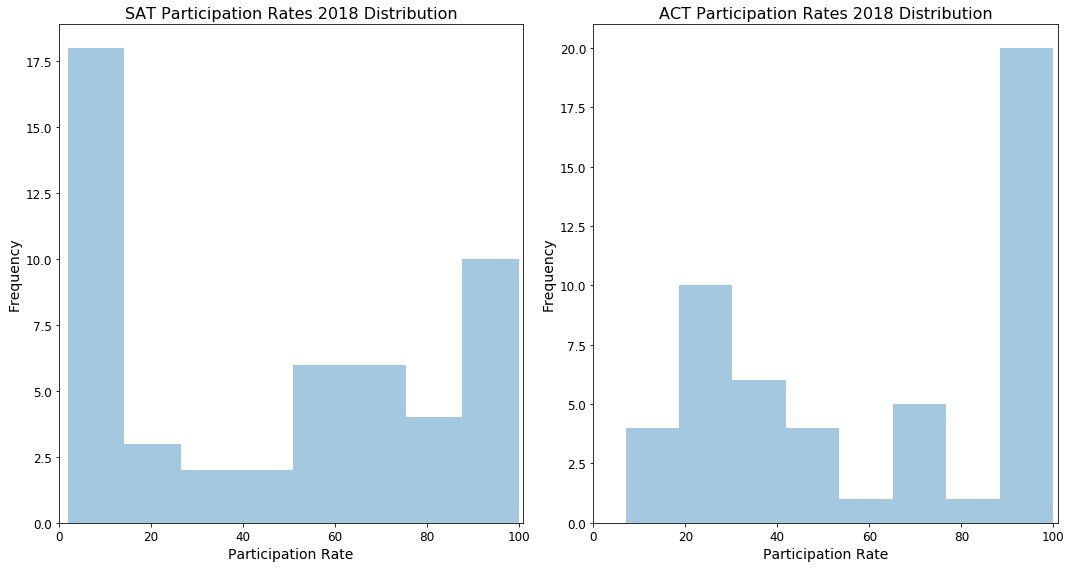

In [102]:
plt.figure(figsize = (15,8))

# SAT Participation Rates 2018 histogram
plt.subplot(1,2,1) 
sns.distplot(df.sat_participation_18, kde=False, bins=8);

plt.title('SAT Participation Rates 2018 Distribution', fontsize=16);
plt.xlabel('Participation Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 101)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# ACT Participation Rates 2018 histogram
plt.subplot(1,2,2) 
sns.distplot(df.act_participation_18,kde=False,bins=8);
plt.title('ACT Participation Rates 2018 Distribution', fontsize=16);
plt.xlabel('Participation Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 101)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('./images/2018_participation_histograms.png');

In [103]:
def compare_values(act_col, sat_col):
    act_vals=[]
    sat_vals=[]
    
    for a_val in act_col:
        act_vals.append(a_val)
        
    for s_val in act_col:
        sat_vals.append(s_val)
        
    print('Values in ACT only: ')
    for val_a in act_vals:
        if (val_a not in sat_vals):
            print(val_a)
            
    print('--------------------------')
    
    print('Values in SAT only: ')
    for val_s in sat_vals:
        if (val_s not in act_vals):
            print (val_s)